   age  sex       bmi  children  smoker     region      charges
0   19    1    27.900         0       1  southwest  16884.92400
1   18    0    33.770         1       0  southeast   1725.55230
2   28    0    33.000         3       0  southeast   4449.46200
3   33    0    22.705         0       0  northwest  21984.47061
4   32    0    28.880         0       0  northwest   3866.85520
5   31    1    25.740         0       0  southeast   3756.62160
6   46    1    33.440         1       0  southeast   8240.58960
7   37    1    27.740         3       0  northwest   7281.50560
8   37    0  1129.830         2       0  northeast   6406.41070
9   60    1    25.840         0       0  northwest  28923.13692
Data after removing outliers
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Age Mean:
Age Median:
Charges Mean
Charges Median:


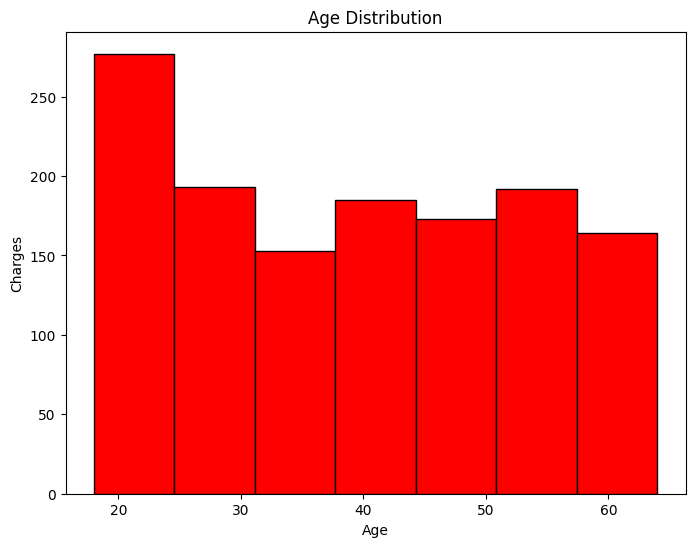

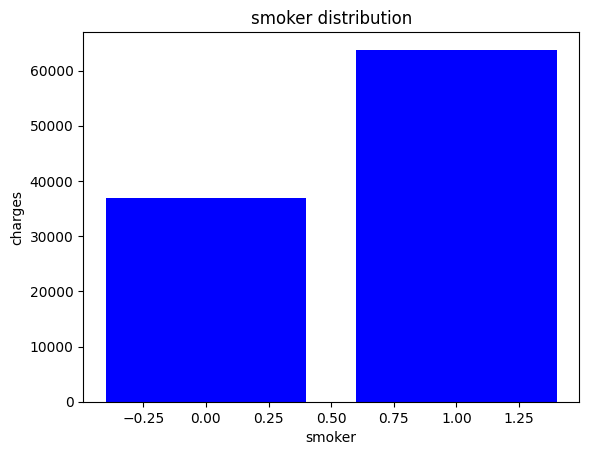

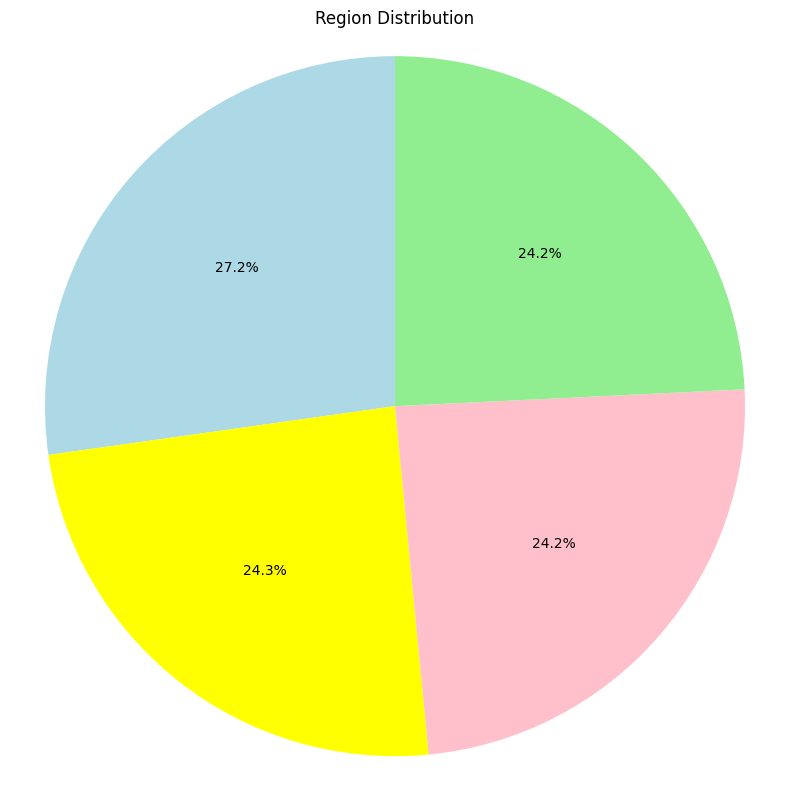

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/wasissigma-create/Wasis/refs/heads/main/insurance.csv')
df = pd.DataFrame(df)

#2
df.drop_duplicates(inplace=True)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
print(df.head(10))

#3
df.dropna()
df.fillna(df['age'].mean(), inplace=True)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.75 * IQR
filtered_data = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
print("Data after removing outliers")
print(filtered_data)

#4
df['toolcharges'] = df['children'] * df['charges']

#5
print("Age Mean:")
df['age'].mean()
print("Age Median:")
df['age'].median()
print("Charges Mean")
df['charges'].mean()
print("Charges Median:")
df['charges'].median()


plt.figure(figsize=(8,6))
plt.hist(df['age'], bins=7, color='red', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

smoker=df['smoker']
charges=df['charges']
plt.bar(smoker,charges, color='blue')
plt.title("smoker distribution")
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()


region1= df['region'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(region1, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'yellow', 'pink', 'lightgreen'])
plt.title("Region Distribution")
plt.axis('equal')
plt.tight_layout()
plt.savefig("pie-chart.png")
plt.show()